# Задание 1. Загрузка данных из файлов

In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [4]:
dataFrameTutorialCompleted = pd.read_csv("hw_lesson02_tutorial_completed.csv")
dataFrameSessions = pd.read_excel("hw_lesson02_sessions.xlsx")

In [5]:
print(dataFrameTutorialCompleted.head())
dataFrameTutorialCompleted.info()

        user_id          event_name             event_dt  duration_sec
0  --0-b0cbb8-a  tutorial_completed  2020-06-08 13:46:07           951
1  --014ca35_b7  tutorial_completed  2020-05-09 04:20:13          1143
2  --0424774bcb  tutorial_completed  2020-05-30 07:23:05          3758
3  --043682a1ad  tutorial_completed  2020-05-15 03:14:40          1326
4  --05-26b0-6b  tutorial_completed  2020-05-20 13:07:08          2828
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59857 entries, 0 to 59856
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       59857 non-null  object
 1   event_name    59857 non-null  object
 2   event_dt      59857 non-null  object
 3   duration_sec  59857 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
print(dataFrameSessions.head())
dataFrameSessions.info()

        user_id         region  device  channel  session_duration  \
0  d35ad20dd45d            SEA  iPhone  GameAds       2589.186227   
1  ac4a113c52c_            CIS  iPhone  GameAds       1467.539334   
2  d0337d117cc8            CIS  iPhone  GameAds       3777.737508   
3  2f8c_262-_85  North America  iPhone  GameAds       3755.966201   
4  4b1-114-4692         Europe  iPhone  GameAds       2898.802314   

        session_start  
0 2020-04-01 17:51:25  
1 2020-04-01 09:39:33  
2 2020-04-01 01:19:56  
3 2020-04-01 11:21:54  
4 2020-04-01 18:29:57  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167890 entries, 0 to 167889
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           167890 non-null  object        
 1   region            167890 non-null  object        
 2   device            167890 non-null  object        
 3   channel           167890 non-null  object        
 

In [7]:
dataFrameSessions['region'].value_counts()

region
CN               33116
North America    28260
CIS              26187
Europe           23413
South America    19962
Africa           15049
SEA              12356
Australia         9547
Name: count, dtype: int64

Наибольшее количество пользователей из Китая, на втором месте северная америка, на третьем - страны снг.

In [8]:
dataFrameSessions['device'].value_counts()

device
Andoroid    116186
iPhone       51704
Name: count, dtype: int64

В основном пользователи используют устройства Android

In [9]:
minDateStartSession = np.min(dataFrameSessions['session_start'])
maxDateStartSession = np.max(dataFrameSessions['session_start'])
print(minDateStartSession)
print(maxDateStartSession)
print(maxDateStartSession - minDateStartSession)

2020-04-01 00:00:23
2020-06-30 23:59:45
90 days 23:59:22


Минимальное время начала 2020-04-01 00:00:23
Максимальное время начала 2020-06-30 23:59:45
Разница между минимальным и максимальным временем начала 90 дней 23:59:22

In [10]:
minDateStartSession = pd.Timestamp(np.min(dataFrameTutorialCompleted['event_dt']))
maxDateStartSession = pd.Timestamp(np.max(dataFrameTutorialCompleted['event_dt']))
print(minDateStartSession)
print(maxDateStartSession)
print(maxDateStartSession - minDateStartSession)

2020-04-01 00:04:01
2020-06-30 23:54:40
90 days 23:50:39


Минимальное время начала 2020-04-01 00:04:01
Максимальное время начала 2020-06-30 23:54:40
Разница между минимальным и максимальным временем начала 90 дней 23:50:39

# Описательная статистика

In [11]:
display(float(np.sqrt(np.mean(np.square(dataFrameTutorialCompleted['duration_sec'])))))
display(float(np.median(dataFrameTutorialCompleted['duration_sec'])))
display(float(np.mean(dataFrameTutorialCompleted['duration_sec'])))

3151.8485460646693

2398.0

2696.541356900613

Среднеквадратичное значение duration_sec - 3151.8485460646693
Медиана - 2398
Среднее - 2696.541356900613

In [12]:
display(float(np.median(dataFrameTutorialCompleted['duration_sec'])/60))
display(float(np.mean(dataFrameTutorialCompleted['duration_sec'])/60))

39.96666666666667

44.942355948343554

Медианное значение duration_sec в минутах - 39.96666666666667
Среднее значение в минутх - 44.942355948343554

In [13]:
plt.close("all")

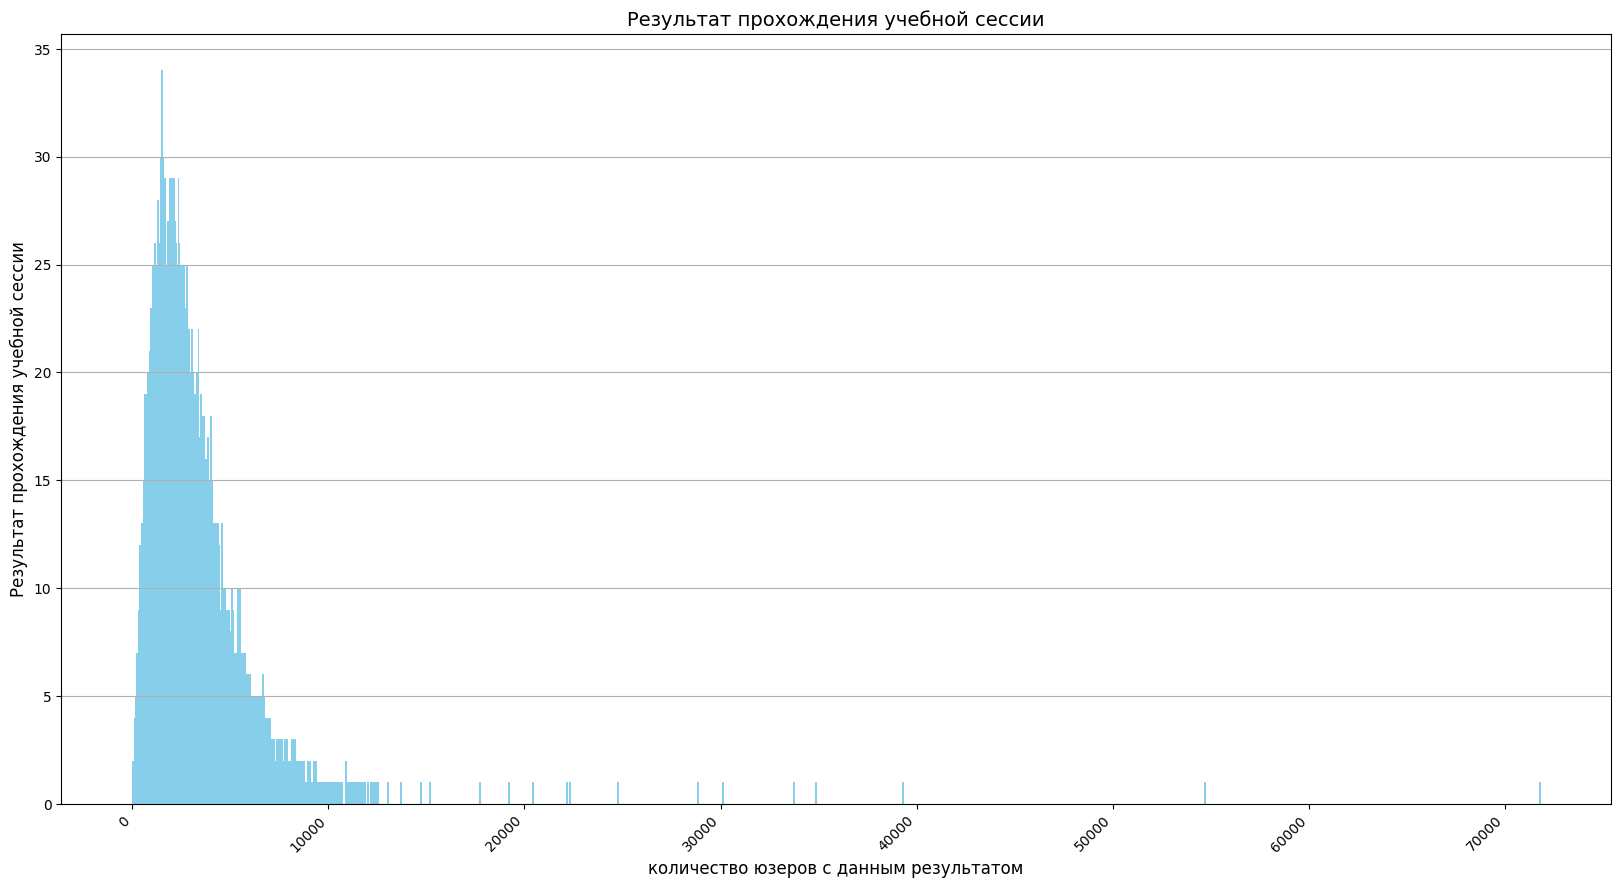

In [19]:
sum_ds = dataFrameTutorialCompleted['duration_sec'].value_counts().reset_index()
sum_ds.columns=['количество юзеров с данным результатом', 'Результат прохождения учебной сессии']

plt.figure(figsize=(20, 10))
plt.bar(sum_ds['количество юзеров с данным результатом'], sum_ds['Результат прохождения учебной сессии'],  width=100, color='skyblue')
plt.title('Результат прохождения учебной сессии', fontsize=14)
plt.xlabel('количество юзеров с данным результатом',  fontsize=12)
plt.ylabel('Результат прохождения учебной сессии', fontsize=12)
plt.xticks(rotation=45, horizontalalignment='right')
plt.grid(axis='y')
# plt.tight_layout()
plt.show()

In [15]:
display(float(np.sqrt(np.mean(np.square(dataFrameSessions['session_duration'])))))
display(float(np.median(dataFrameSessions['session_duration'])))
display(float(np.mean(dataFrameSessions['session_duration'])))

2556.7307545292683

1250.3175364674275

1807.922733189622

In [16]:
display(float(np.median(dataFrameSessions['session_duration'])/60))
display(float(np.mean(dataFrameSessions['session_duration'])/60))

20.83862560779046

30.132045553160367

In [17]:
plt.close("all")

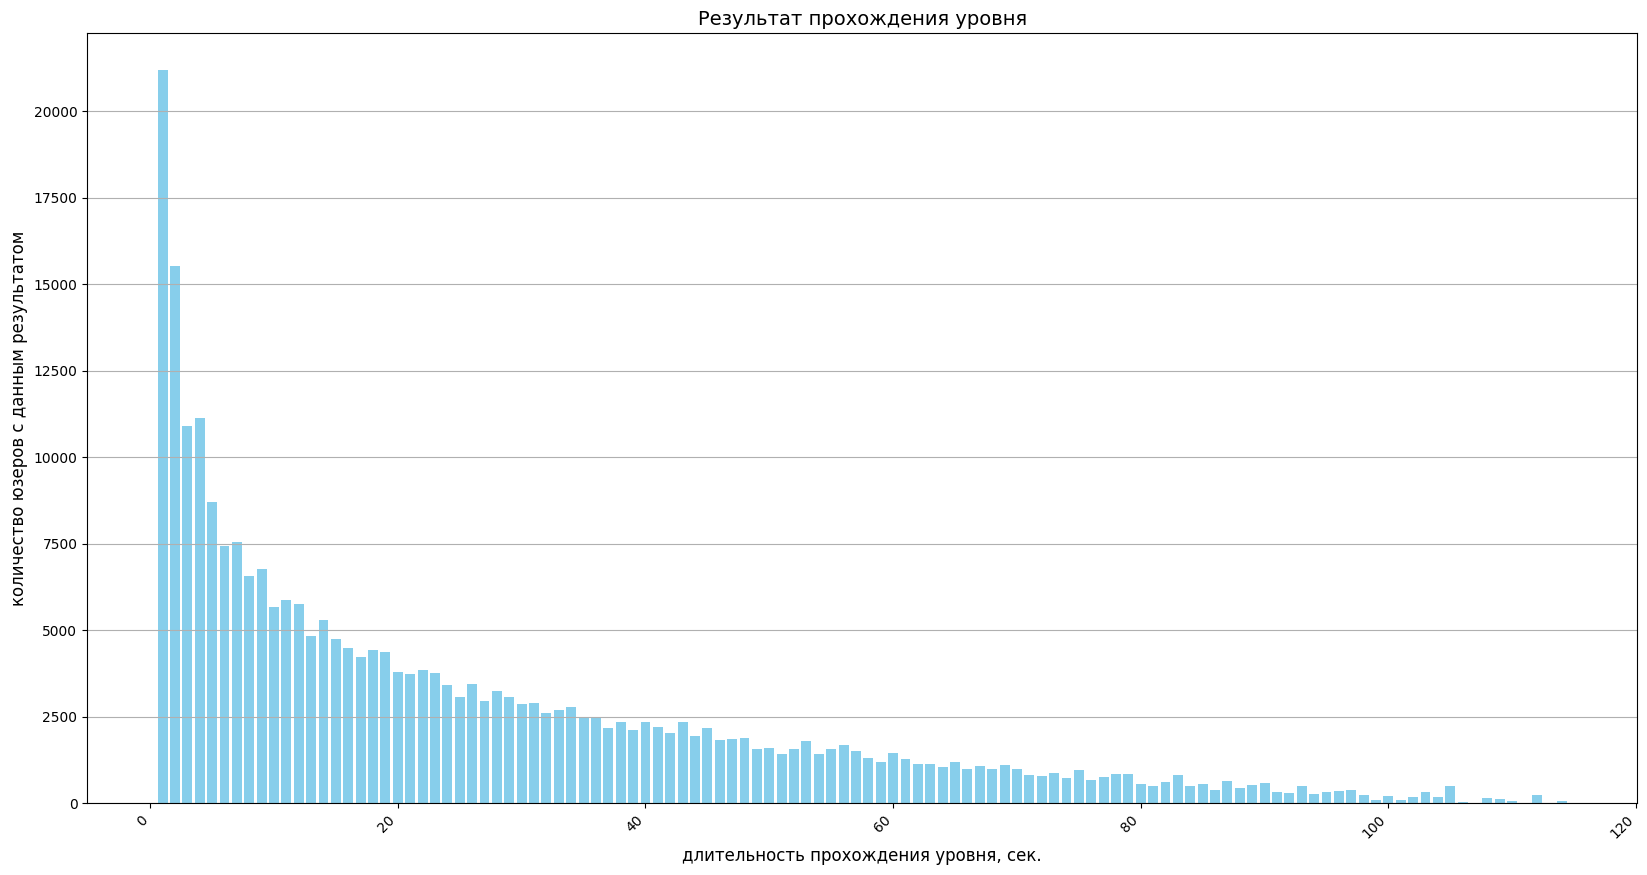

In [22]:
#sum_sd=list(i / 60 / 60 for i in dfLessonSessions['session_duration'].to_numpy())
#sum_sd = dfLessonSessions['session_duration'].apply(np.ceil)
sum_sd = dataFrameSessions['session_duration'].apply(np.ceil).value_counts().reset_index()
sum_sd.columns = ['количество юзеров с данным результатом', 'длительность прохождения уровня']
plt.figure(figsize=(20, 10))
plt.bar(sum_sd['длительность прохождения уровня'], sum_sd['количество юзеров с данным результатом'], color='skyblue')
plt.title('Результат прохождения уровня', fontsize=14)
plt.ylabel('количество юзеров с данным результатом',  fontsize=12)
plt.xlabel('длительность прохождения уровня, сек.', fontsize=12)
plt.xticks(rotation=45, horizontalalignment='right')
plt.grid(axis='y')
# plt.tight_layout()
plt.show()

Исходя из графиков мы можем понять что большее количество человек либо пропускают учебную сессию, либо быстро ее пропускают.

# Исследование выбросов

In [26]:
plt.close("all")

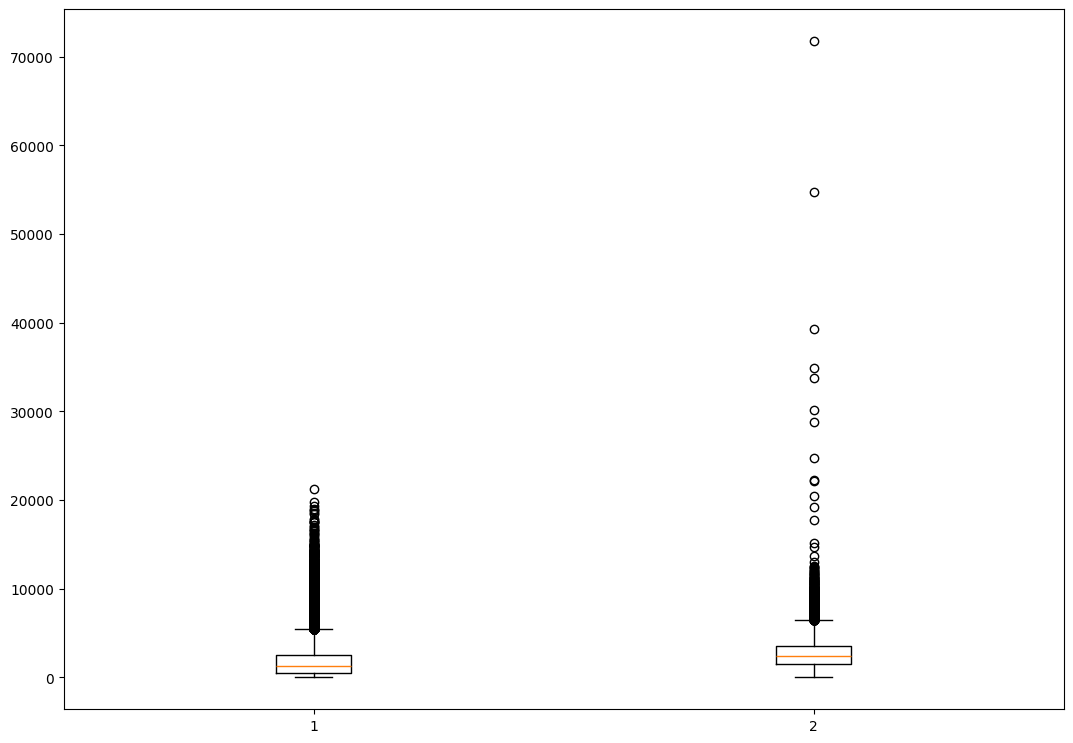

In [44]:
np.random.seed(10)

data_1 = dataFrameSessions['session_duration']
data_2 = dataFrameTutorialCompleted['duration_sec']
data = [data_1, data_2]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.show()

In [46]:
dataFrameSessions99Percentile = dataFrameSessions['session_duration'].quantile(0.99)
dataFrameTutorialCompleted99Percentile = dataFrameTutorialCompleted['duration_sec'].quantile(0.99)
print(dataFrameSessions99Percentile)
print(dataFrameTutorialCompleted99Percentile)

8323.137208860211
7605.440000000002


Описание выводов и наблюдений

# Сохранение данных в файл

In [47]:
percentSessions25 = dataFrameSessions['session_duration'].quantile(0.25)
percentSessions75 = dataFrameSessions['session_duration'].quantile(0.75)
sortedDataframeSessions = dataFrameSessions.query(f'session_duration > {percentSessions25} & session_duration < {percentSessions75}')
sortedDataframeSessions.to_csv('sortedDataframeSessions.csv', header=False, index=False)

In [ ]:
percentTutorial25 = dataFrameTutorialCompleted['duration_sec'].quantile(0.25)
percentTutorial75 = dataFrameTutorialCompleted['duration_sec'].quantile(0.75)
sortedDataframeTutorial = dataFrameTutorialCompleted.query(f'duration_sec > {percentTutorial25} & duration_sec < {percentTutorial75}')
sortedDataframeTutorial.to_csv('sortedDataframeTutorial.csv', header=False, index=False)

#  Фильтрация выбросов с помощью функции

In [ ]:
def filter_outliers(df, nm, qu):
    newdf = df.query(f'{nm} < {df.quantile(qu)}')
    return newdf